In [11]:
import pandas as pd
import ast
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from week 13 in YY's Data Vis Class
# import spacy
# import wordcloud
# import en_core_web_sm
# # nlp = spacy.load('en')
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)


print("done")

done


In [12]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis


elist_filename = "../data/editorials-1.jl"
tags_filename = "../data/by_article_110219.jl"
# full_filename = "../data/by_article_fulltext_112919-2.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

# tag_df = imp.init_df(tags_filename, "tags")
# edi_df = imp.init_df(elist_filename, "editorial")
full_df = imp.init_df(full_filename, "full", advice=False)

print("done")


done


After scraping from Science Careers at sciencecmag.com/careers, there are still different numbers of article entries from the different methods of scraping. I don't like, but I'm not sure how to fix it. However, the tags file and the full file are only 20 away from each other, which could be close enough; these were scraped by following the links on the list and scraping from each article's individual page, which I think could be more reliable. Editorials was scraped only from the pages of links to the articles, which may be less reliable. Furthermore, the full dataset contains the tags list, so I may just start using full only. 

In [13]:
# print("editorials dataset")
# print(len(edi_df))
# print("tags dataset")
# print(len(tag_df))
print("full dataset")
print(len(full_df))
print(max(full_df["year"]))

full_df20 = full_df[full_df.year<2020]

print("full dataset")
print(len(full_df20))
print(max(full_df20["year"]))

full_df.head(3)

full dataset
6124
2020
full dataset
6112
2019


,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2,advice,one_time
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"by welcome to ""tooling up,"" a monthly column about job hunting and career development for sci...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,59,no,yes,yes,no
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by 've always hated the term ""cover letter."" it implies that the letter you send out to acco...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",81,12,1996,59,no,yes,yes,no
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,1997-09-26,8:00 am,"by e all know that, with respect to fashion, the world holds a rather dim view of scientists...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",361,21,1997,59,no,yes,yes,no


The plot of the number of posts each year from the start of the careers section to the present day shows a large spike in the number of posts around 2002 reaching a height of about 650, and a smaller bump around 2014 reaching about 350.

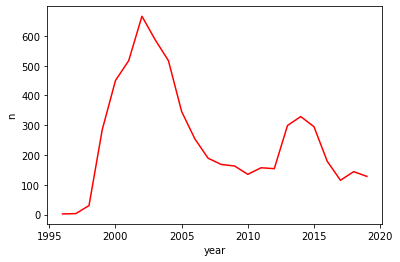

In [14]:
full_df = full_df20

full_vis = vis.prep_per(full_df, group_by = "year", color = "red", test = False)

sns.lineplot(x = "year", y = "n", color = "red", data = full_vis)

# plt.savefig("../figs/all articles.png")

However, of these articles, the number of posts each author varies radically, as around 0.8 of the authors have written 1 or 2 posts, while several authors in the long tail have written many, many posts. For this reason, I want to see some authors as columnists, who regularly write and submit articles, while most authors are 1 or 2 time contributors. 

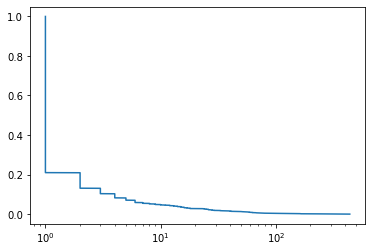

In [15]:
authors = full_df["authors"].value_counts()
authors_df = pd.DataFrame(authors)
authors_df.head(10)

plt.xscale(value = "log")
plt.plot(np.flip(np.sort(authors_df.authors)), np.linspace(0, 1, len(authors_df.authors), endpoint=False))
# plt.savefig("../figs/author_ccdf.png")

In the following plot, the red line continues to show the total number of posts per year, the green and blue lines repectively show the columnists and 1-2 time authors. While the both columnists and noncolumnists seem to have contributed to the first spike, the second spike seems to be explained mostly by the increase in the number of posts written by columnists. There are consistently fewer posts by noncolumnists per year, typically under 20 per year. but the number of posts authored by columnists is relatively higher. 

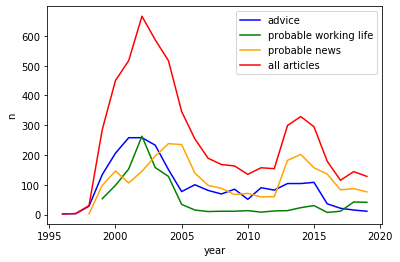

In [16]:
# column = vis.dual_per(full_df, split = "column2", test = False) # group_by = "avg_month", 

# column1 = column[0][0]
# column2 = column[1][0]

# column_df0 = vis.prep_per(column1, group_by = "year", color = "red", test = False)
# column_df1 = vis.prep_per(column2, group_by = "year", color = "blue", test = False)

# sns.lineplot(x = "year", y = "n",
# color = "green", legend="full",
# data = column_df0) 
# sns.lineplot(x = "year", y = "n",
# color = "blue", legend="full",
# data = column_df1)
# sns.lineplot(x = "year", y = "n",
# color = "red", legend="full",
# data = full_vis)

# plt.savefig("../figs/columnsovertime.png")
# # fig.savefig('plot.png')

# full_df["advice"] = ["yes" if "advice" in x else "no" for x in full_df["tags"]]
full_df["probnews"] = np.where(
        (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
        "yes",
        "no",
    )

one_time_df = full_df[full_df.one_time == "yes"]
advice_df = full_df[full_df.advice == "yes"]
probnews_df = full_df[full_df.probnews == "yes"]

advice_vis = vis.prep_per(advice_df, group_by = "year")
one_time_vis = vis.prep_per(one_time_df, group_by = "year")
probnews_vis = vis.prep_per(probnews_df, group_by = "year")

sns.lineplot(x = "year", y = "n", color = "blue", legend="full", label="advice", data = advice_vis) 
sns.lineplot(x = "year", y = "n", color = "green", legend="full", label="probable working life", data = one_time_vis)
sns.lineplot(x = "year", y = "n", color = "orange", legend="full", label="probable news", data = probnews_vis)
sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

# plt.savefig("../figs/article_types.png")

In [17]:
full_df[full_df.one_time == "yes"].head(2)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,n_posts_author,column1,column2,advice,one_time,n,probnews
681,5878,forensic science: maggots tell all,"[job market, europe]",mark benecke,1999-01-15,0:00 am,"by uring my studies of biology at the university of cologne in germany, i realized that h...",[],837,37,1999,1,no,no,no,yes,1,no
693,5880,forensic science: what you need to know to be a forensic scientist,"[job market, europe]",jim thorpe,1999-01-22,0:00 am,by am the director of the forensic science unit that is part of the department of pure a...,[],844,37,1999,1,no,no,no,yes,1,no


In [20]:
# one time vis starts 1998
# prob news vis starts 1998
# probnews_vis.head()

new_row2 = pd.DataFrame({"year":[1996,1997], "id":["NA","NA"], "date_seq":["NA","NA"],"month_seq":["NA","NA"],"n_posts_author":["NA","NA"],"n":[0,0]})
new_row3 = pd.DataFrame({"year":[1996,1997,1998], "id":["NA", "NA","NA"], "date_seq":["NA","NA","NA"],"month_seq":["NA","NA","NA"],"n_posts_author":["NA","NA","NA"],"n":[0,0,0]})
one_time_vis = pd.concat([new_row3, one_time_vis]).reset_index(drop = True) 
probnews_vis = pd.concat([new_row2, probnews_vis]).reset_index(drop = True) 

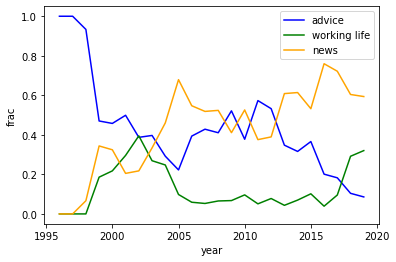

In [21]:
advice_vis["frac"] = advice_vis["n"]/full_vis["n"]
one_time_vis["frac"] = one_time_vis["n"]/full_vis["n"]
probnews_vis["frac"] = probnews_vis["n"]/full_vis["n"]

sns.lineplot(x = "year", y = "frac", color = "blue",label="advice", data=advice_vis)
sns.lineplot(x = "year", y = "frac", color = "green",label="working life", data=one_time_vis)
sns.lineplot(x = "year", y = "frac", color = "orange",label="news", data=probnews_vis)

# plt.savefig("../figs/article_types_frac.png")



# Tags Work

Each article has been marked with a number of topical tags for searchability on the science careers website. These are their stories. 

There is a total of 409 tags. 
An average of 3 something tags are applied to each post

In [15]:
# should work directly after importing and processing
tags_dict_id = tgs.tag_incidence(full_df, lifespan=True, id_col_tag=True, binary=True, dict_return=True)
tags_df_id =  tgs.tag_incidence(full_df, lifespan = True, id_col_tag=True, binary=True, dict_return=False)
year_inc = tgs.inc_per_year(tags_dict_id)
coltags_dict_id = tgs.tag_incidence(full_df, lifespan=True, id_col_tag=True, binary=True, dict_return=True)
coltags_year_inc = tgs.inc_per_year(coltags_dict_id, columns="yes")
alltags_dict_id = tgs.tag_incidence(full_df, lifespan=True, id_col_tag=True, binary=True, dict_return=True)
alltags_year_inc = tgs.inc_per_year(alltags_dict_id, columns="all")

# total tags
print(len(tags_dict_id))

#tags without columns
print(len([key for key in tags_dict_id.keys() if tags_dict_id[key]["overall"]["col_tag"] == "no"]))

# average tags per post
print(np.average(tags_df_id.groupby(by = "headline").size()))

407
364
3.770037698737912


top tags per year, not including tags that distinguished partiular columns.
an analysis of the tags will probably not be all that useful because the tags are all so generic. Also, the only visible pattern is that the number of tags being used each year increases over time, so the tags that are applied to the later years, may just be representative of the fact that there are more tags being applied. You can't say that the tags indicate that we're talking more about the concepts (postdocs, say) in the tags because in general, it might be that those tags weren't applied in the past. 

In [16]:
for i in range(1996,2019):
    # print(year_inc[year_inc["year"]== i].sort_values(by = ["incidence"], ascending=False))
    print(year_inc[year_inc["year"]== i].nlargest(round(len(year_inc[year_inc["year"]== i])/8), columns="incidence"),"\n")

year     tag  incidence
44  1996  advice          2 

    year     tag  incidence
45  1997  advice          3 

     year       tag  incidence
33   1998    advice         28
240  1998  americas         28 

     year       tag  incidence
229  1999  americas        221
30   1999    advice        130 

     year                      tag  incidence
226  2000                 americas        279
1    2000  issues and perspectives        212 

     year       tag  incidence
233  2001  americas        296
26   2001    advice        256 

     year         tag  incidence
227  2002    americas        355
55   2002  job market        277
31   2002      advice        258 

     year       tag  incidence
228  2003  americas        300
257  2003    europe        258 

     year         tag  incidence
235  2004    americas        306
52   2004  job market        211 

     year         tag  incidence
234  2005    americas        245
47   2005  job market        143
214  2005    academic        127 


The column tags that appeared each year.

In [17]:
for i in range(1996,2019):
    # print(year_inc[year_inc["year"]== i].sort_values(by = ["incidence"], ascending=False))
    print(coltags_year_inc[coltags_year_inc["year"]== i].sort_values(by="incidence"),"\n")

year         tag  incidence
0  1996  tooling up          2 

   year         tag  incidence
1  1997  tooling up          3 

    year         tag  incidence
23  1998      column          1
59  1998     classic          1
2   1998  tooling up         23 

   year         tag  incidence
3  1999  tooling up         22 

   year         tag  incidence
4  2000  tooling up         21 

   year         tag  incidence
5  2001  tooling up         10 

   year         tag  incidence
6  2002  tooling up         20 

    year                tag  incidence
78  2003  taken for granted          6
7   2003         tooling up         17 

    year                tag  incidence
37  2004  from the archives          2
8   2004         tooling up         11
79  2004  taken for granted         11 

     year                tag  incidence
106  2005       mind matters          1
9    2005         tooling up         11
80   2005  taken for granted         12 

     year                tag  incidence
107  2006 

Incidence of the advice tag over time compared with full set

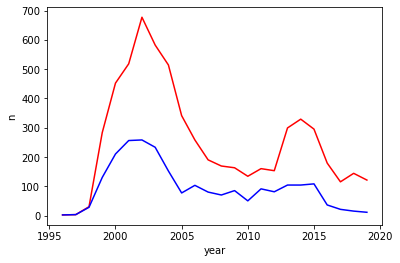

In [6]:
full_vis = vis.prep_per(full_df, group_by = "year", color = "red")

full_df["advice"] = ["yes" if "advice" in x else "no" for x in full_df["tags"]]
advice_df = full_df[full_df.advice == "yes"]

advice_vis = vis.prep_per(advice_df, group_by = "year", color = "blue", test = False)

sns.lineplot(x = "year", y = "n", color = "red", data = full_vis)
sns.lineplot(x = "year", y = "n", color = "blue", data = advice_vis)

# plt.savefig("../figs/adviceovertime.png")